# 📊 Modelo de Previsão de Preços de Aluguéis Temporários  

Bem-vindo ao nosso projeto de previsão de preços para aluguéis temporários! 🏡💰  

## 🎯 Objetivo  
Este projeto tem como propósito explorar dados do mercado de aluguéis temporários e construir um modelo preditivo capaz de estimar preços com precisão.  

## 🔍 Etapas do Projeto  
1. **Análise Exploratória de Dados (EDA)**: Compreensão das variáveis, identificação de padrões e tratamento de inconsistências.  
2. **Pré-processamento**: Limpeza dos dados, engenharia de features e normalização das variáveis.  
3. **Modelagem**: Treinamento de algoritmos de machine learning para prever os preços dos aluguéis.  
4. **Avaliação**: Medição da performance do modelo por meio de métricas como RMSE e R².  

## 🚀 Tecnologias Utilizadas  
- **Python** 🐍  
- **Pandas & NumPy** para manipulação de dados  
- **Matplotlib & Seaborn** para visualização  
- **Scikit-learn** para modelagem preditiva  

📌 *Este notebook documenta todas as etapas do desenvolvimento, desde a análise exploratória até a previsão dos preços. Vamos juntos nessa jornada de dados!*  


# 📌 Bibliotecas Utilizadas:

In [39]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [118]:
df = pd.read_csv('teste_indicium_precificacao.csv')
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

### 🚀 *CONCLUSÃO*

O dataset analisado contém 16 colunas, incluindo variáveis numéricas e categóricas. A maioria das colunas possui 48.894 registros, porém algumas apresentam valores ausentes. Em etapas futuras, iremos aprofundar a análise dessas inconsistências e propor estratégias para tratamento dos dados.

# 📌 Análise exploratória (EDA):

### Verificação de valores ausentes:

In [119]:
# Obtendo os dados.
valores_ausentes = df.isnull().sum() 
contatem_total = df.isnull().count()
porcentagem = round(valores_ausentes / contatem_total * 100, 2) 

# Criando o dataframe.
df_ausentes = pd.DataFrame({'Total de Valores Ausentes': valores_ausentes, 'Porcentagem': porcentagem})
df_ausentes

,Total de Valores Ausentes,Porcentagem
id,0,0.00
nome,16,0.03
host_id,0,0.00
host_name,21,0.04
bairro_group,0,0.00
bairro,0,0.00
latitude,0,0.00
longitude,0,0.00
room_type,0,0.00
price,0,0.00


**Conclusão**:

O conjunto de dados apresenta diversos valores ausentes, com destaque para as colunas ``name``, ``host_name``, ``ultima_review`` e ``reviews_por_mes``. Em análises futuras, iremos investigar o impacto dessas ausências e definir estratégias adequadas para o tratamento dos dados.


## Análises gráfica:
Nesta seção, exploraremos as características numéricas do conjunto de dados, identificando quais variáveis são discretas e quais são contínuas. Utilizaremos visualizações gráficas para entender melhor a distribuição e os padrões dos dados.

📊 Análises Gráficas realizadas:

1- Distribuição dos preços dos aluguéis → Histograma

2- Correlação entre preço e número de avaliações → Scatter Plot

3- Disponibilidade ao longo do ano → Boxplot por tipo de acomodação

4- Distribuição geográfica dos imóveis → Mapa de dispersão (scatter plot de latitude/longitude)

5- Número de imóveis por bairro → Gráfico de barras

In [43]:
num_feature = [feature for feature in df.columns if df[feature].dtype != 'O']

In [44]:
discrete = [feature for feature in num_feature if df[feature].nunique() < 25 and feature != 'priceSqFt']
continuous = [feature for feature in num_feature if feature not in discrete and feature != 'priceSqFt' ]
print(f'Número de colunas discretas: {len(discrete)}')
print(f'Número de colunas contínuas: {len(continuous)}')
print(f'Nomes das colunas numéricas: {num_feature}')

Número de colunas discretas: 0
Número de colunas contínuas: 10
Nomes das colunas numéricas: ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365']


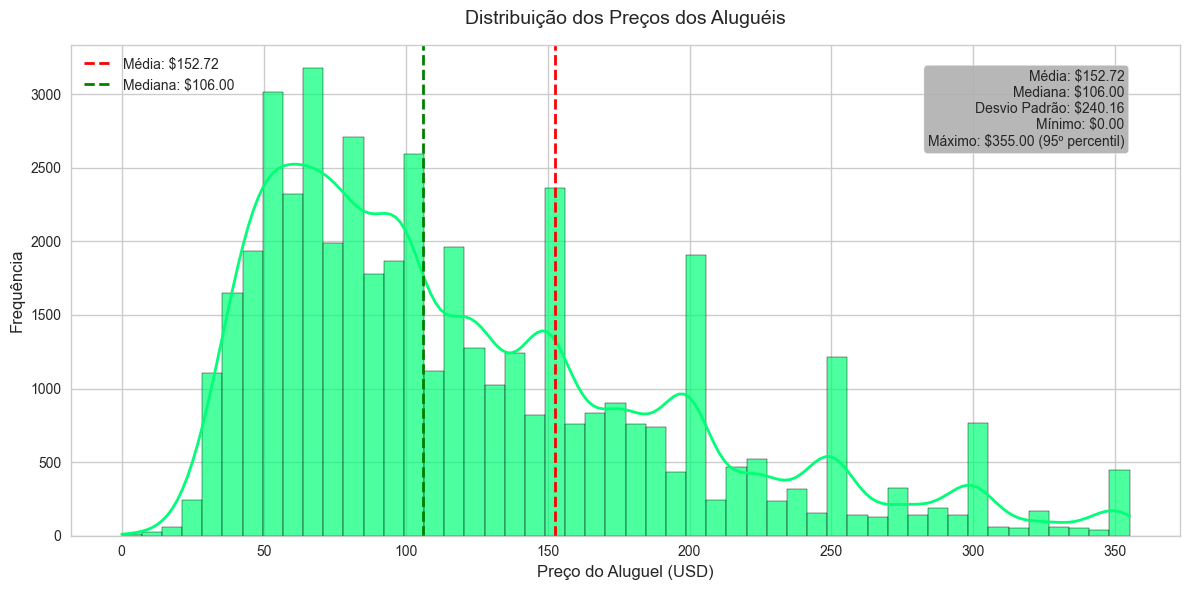

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
df = pd.read_csv('teste_indicium_precificacao.csv')

# Configurar o estilo
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Definir limite de preço (95º percentil)
price_limit = df["price"].quantile(0.95)

# Criar o histograma
sns.histplot(data=df[df["price"] <= price_limit], 
            x="price",
            bins=50,
            kde=True,
            color='#00FF77',
            edgecolor='black',
            alpha=0.7)

# Adicionar linhas verticais para estatísticas importantes
plt.axvline(df["price"].mean(), 
           color='red', 
           linestyle='--', 
           label=f'Média: ${df["price"].mean():.2f}')

plt.axvline(df["price"].median(), 
           color='green', 
           linestyle='--', 
           label=f'Mediana: ${df["price"].median():.2f}')

# Personalizar o gráfico
plt.title("Distribuição dos Preços dos Aluguéis", pad=15, fontsize=14)
plt.xlabel("Preço do Aluguel (USD)", fontsize=12)
plt.ylabel("Frequência", fontsize=12)

# Adicionar informações estatísticas
stats_text = (f'Média: ${df["price"].mean():.2f}\n'
             f'Mediana: ${df["price"].median():.2f}\n'
             f'Desvio Padrão: ${df["price"].std():.2f}\n'
             f'Mínimo: ${df["price"].min():.2f}\n'
             f'Máximo: ${price_limit:.2f} (95º percentil)')

plt.text(0.95, 0.95, stats_text,
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='#B0B0B0', alpha=0.9),
         fontsize=10)

# Adicionar legenda
plt.legend()

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

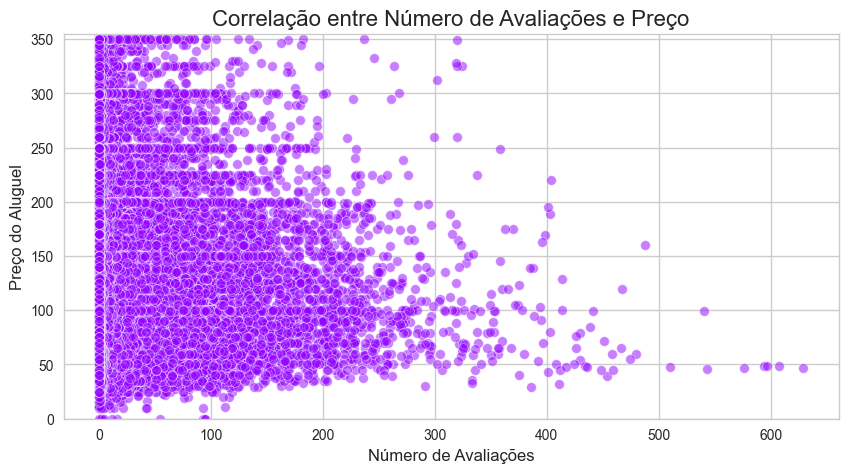

In [93]:

# 2. Correlação entre preço e número de avaliações
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["numero_de_reviews"], y=df["price"], alpha=0.5,c='#9100FF')
plt.xlabel("Número de Avaliações")
plt.ylabel("Preço do Aluguel")
plt.title("Correlação entre Número de Avaliações e Preço")
plt.ylim(0, df["price"].quantile(0.95))
plt.show()

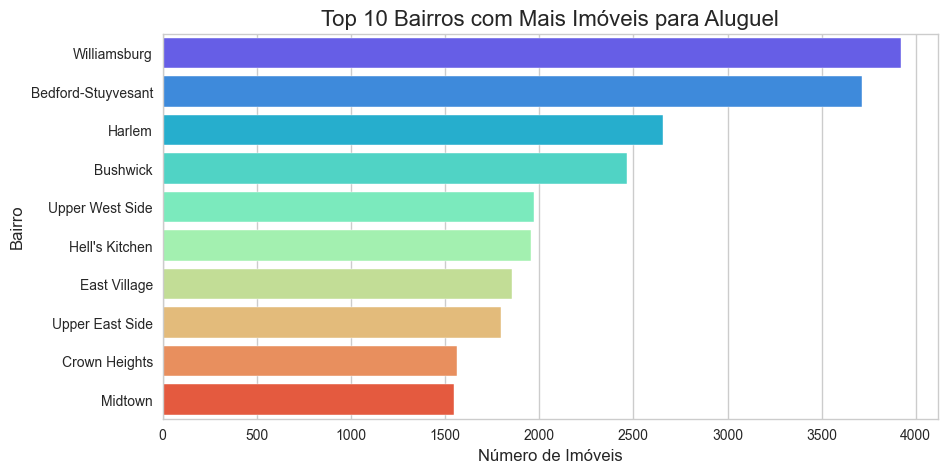

In [ ]:
# 5. Número de imóveis por bairro
plt.figure(figsize=(10, 5))
top_bairros = df["bairro"].value_counts().nlargest(10)
sns.barplot(x=top_bairros.values, y=top_bairros.index, palette="rainbow")
plt.xlabel("Número de Imóveis")
plt.ylabel("Bairro")
plt.title("Top 10 Bairros com Mais Imóveis para Aluguel")
plt.show()


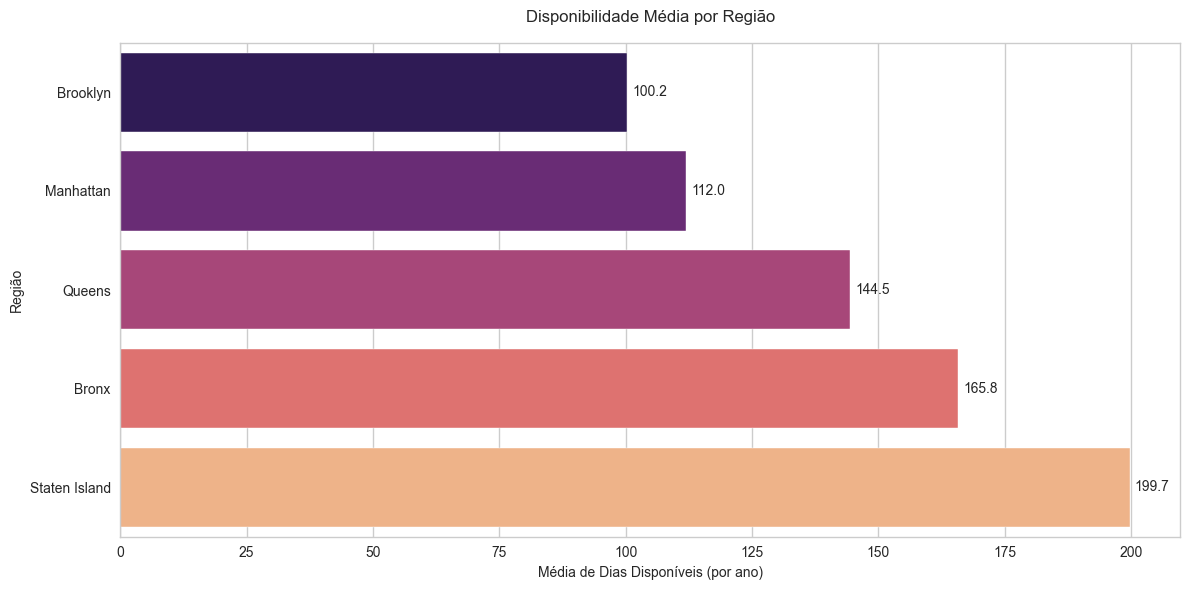

In [71]:
# Calcular a média de disponibilidade por região
availability_mean = df.groupby('bairro_group')['disponibilidade_365'].mean().reset_index()
availability_mean = availability_mean.sort_values('disponibilidade_365', ascending=True)


plt.figure(figsize=(12, 6))
sns.barplot(data=availability_mean, 
            x='disponibilidade_365', 
            y='bairro_group',
            palette='magma',)

plt.title('Disponibilidade Média por Região', pad=15, fontsize=12)
plt.xlabel('Média de Dias Disponíveis (por ano)', fontsize=10)
plt.ylabel('Região', fontsize=10)

for i, v in enumerate(availability_mean['disponibilidade_365']):
    plt.text(v + 1, i, f'{v:.1f}', va='center')

plt.tight_layout()
plt.show()

In [115]:
import plotly.express as px

# Criar um mapa de dispersão com uma nova escala de cores
fig = px.scatter_mapbox(
    df,
    lat='latitude',
    lon='longitude',
    color='price',
    hover_name='price',
    mapbox_style='carto-positron',
    zoom=10,
    height=600,
    color_continuous_scale='cividis'  # Alterne para outras opções como 'viridis', 'magma', 'cividis'
)

# Exibir o gráfico
fig.show()


# 📌 Engenharia de features:
Engenharia de Features (ou Feature Engineering) é o processo de transformar dados brutos em características (features) que melhor representem padrões e informações úteis para modelos de aprendizado de máquina.

### Detecção de Outlier:

Com intuinto de remover outliers do DataFrame, uma estratégia é utilizar uma técnica como o intervalo interquartílico (IQR), que é calculado a partir dos quartis (Q1 e Q3). O intervalo interquartil (IQR) é uma medida estatística que representa a dispersão dos dados em um conjunto.


In [120]:
Q1,Q3= df['price'].quantile([0.25,0.75])

IQR = Q3-Q1

ub = Q3 + (1.5 * IQR)
lb = Q1 - (1.5 * IQR)

df[(df['price'] < lb) | (df['price'] > ub )]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
60,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,2018-11-03,0.12,1,180
84,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,2016-08-04,0.24,1,7
102,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,2019-05-18,0.55,2,243
113,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,2017-08-09,0.06,4,298
120,27659,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,2018-12-30,0.24,2,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48757,36420289,"Rustic Garden House Apt, 2 stops from Manhattan",73211393,LaGabrell,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350,2,0,NaN,NaN,1,364
48832,36450896,Brand New 3-Bed Apt in the Best Location of FiDi,29741813,Yue,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,NaN,NaN,1,64
48838,36452721,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Richard,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,NaN,NaN,1,23
48841,36453160,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,224171371,LuxuryApartmentsByAmber,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,NaN,NaN,1,9


#### *Conclusão*:

Foram detectados cerca de 2.972 outliers na coluna price, que é a variável alvo. O objetivo é removê-los ou tratá-los adequadamente para evitar que afetem negativamente o desempenho e a precisão do modelo preditivo.

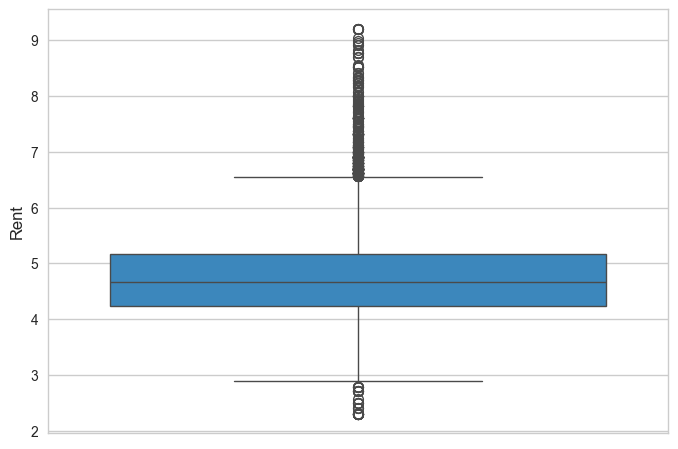

In [121]:
data = df.copy()
data['price'] = np.log(data['price'])
sns.boxplot(data = data,y = 'price')
plt.ylabel('Rent')
plt.show()

In [122]:
df['price'] = df['price'].clip(lower=lb, upper=ub)

**Conclusão**:

Os outliers foram detectados como é demostrado no gráfico boxplot. Logo apos será removido do dataframe.

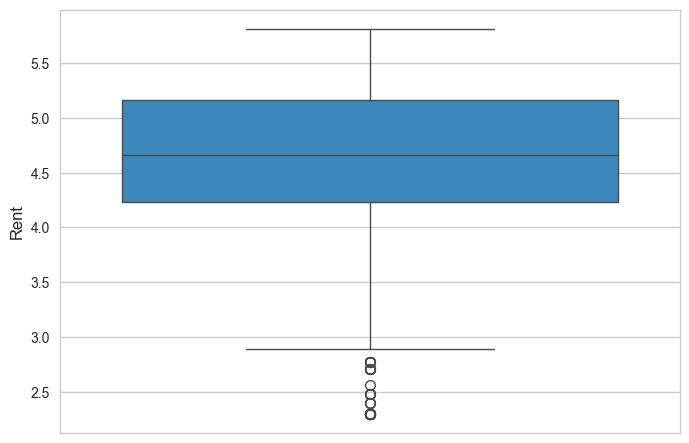

In [123]:
data = df.copy()
data['price'] = np.log(data['price'])
sns.boxplot(data = data,y = 'price')
plt.ylabel('Rent')
plt.show()

In [124]:
outliers_remaining = df[(df['price'] < lb) | (df['price'] > ub)]
print(f'Verificando se existe outliers: {outliers_remaining.shape}')  


Verificando se existe outliers: (0, 16)


## Tratamento de Dados Ausentes:

#### Manipulação de valores ausentes categóricos:

In [125]:

cat_nan = [feature for feature in df.columns if df[feature].isnull().sum() >1 and df[feature].dtype == 'O']

for feature in cat_nan:
    df[feature+'_'+'nan']=np.where(df[feature].isnull(),1,0)
    df[feature].fillna('Missing',inplace=True)

df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_nan,host_name_nan,ultima_review_nan
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0,0,0
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Missing,NaN,1,365,0,0,1
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0,0,0
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0,0,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,0,0,0


**Conclusão**:

- Criar uma nova feature (_nan) que indica a presença de valores ausentes, o que pode ser útil para certos modelos de machine learning.
- Substituir os valores ausentes por 'Missing', permitindo que os algoritmos tratem essa informação como uma categoria válida em vez de valores ausentes.

### Manipulação de valores ausentes numéricos: 


In [126]:
num_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']

for feature in num_nan:
    df[feature+'_'+'nan']=np.where(df[feature].isnull(),1,0)
    df[feature].fillna(df[feature].median(),inplace = True)

df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_nan,host_name_nan,ultima_review_nan,reviews_por_mes_nan
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0,0,0,0
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Missing,0.72,1,365,0,0,1,1
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0,0,0,0
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0,0,0,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,0,0,0,0


**Conclusão**:
- Criar uma nova feature (_nan) para indicar quais valores estavam ausentes antes da substituição.
- Substituir valores ausentes pela mediana para manter a consistência dos dados sem distorcer a distribuição.

In [127]:
df.isnull().sum()

id                               0
nome                             0
host_id                          0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
nome_nan                         0
host_name_nan                    0
ultima_review_nan                0
reviews_por_mes_nan              0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48894 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48894 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  48894 non-null 

## 🛠 Tranformação das Features Categórica:

Nesta seção, iremos converter as colunas categóricas em valores numéricos para que possam ser utilizadas nos modelos de aprendizado de máquina.



In [128]:
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
for feature in cat_feature:
    print(f'Cardinalidade de {feature} é: {df[feature].nunique()}')
    
print (f'Colunas categóricas: {cat_feature}')

Cardinalidade de nome é: 47905
Cardinalidade de host_name é: 11453
Cardinalidade de bairro_group é: 5
Cardinalidade de bairro é: 221
Cardinalidade de room_type é: 3
Cardinalidade de ultima_review é: 1765
Colunas categóricas: ['nome', 'host_name', 'bairro_group', 'bairro', 'room_type', 'ultima_review']


## codificação ordinal (Ordinal Encoding) de features categórica:

In [129]:
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

for feature in cat_feature:
    label_ordered = df.groupby(feature)['price'].mean().sort_values().index
    label_ordered = {k:i for i,k in enumerate(label_ordered, 0)}
    df[feature] = df[feature].map(label_ordered)
    
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_nan,host_name_nan,ultima_review_nan,reviews_por_mes_nan
0,2595,40520,2845,7691,4,213,40.75362,-73.98377,2,225,1,45,988,0.38,2,355,0,0,0,0
1,3647,33148,4632,7244,4,140,40.80902,-73.94190,1,150,3,0,1390,0.72,1,365,0,0,1,1
2,3831,18250,4869,3830,3,162,40.68514,-73.95976,2,89,1,270,1067,4.64,1,194,0,0,0,0
3,5022,15541,7192,7014,4,146,40.79851,-73.94399,2,80,10,9,1359,0.10,1,0,0,0,0,0
4,5099,39220,7322,7567,4,205,40.74767,-73.97500,2,200,3,74,1124,0.59,1,129,0,0,0,0


**Conclusão:**
- Identifica colunas categóricas (dtype == 'O').
- Agrupa por categoria e calcula a média de price.
- Ordena as categorias com base nessa média.
- Mapeia cada categoria para um número inteiro conforme a ordem.
- Substitui os valores categóricos pelo número correspondente

## Padronização com StandarScaler

Padroniza (normaliza) as features numéricas do df usando o StandardScaler do sklearn. O StandardScaler padroniza os dados (média = 0, desvio padrão = 1).   
Calcula a média e o desvio padrão de cada feature para normalizar os valores.
A fórmula para a padronização (ou normalização) dos dados é dada por:

X_scaled = (X - μ) / σ

Onde:
- X é o valor original da feature.
- μ é a média da feature.
- σ é o desvio padrão da feature.


 
Mantém a coluna price inalterada.
Concatena price com os dados escalados para manter o formato original.

In [130]:
feature_scale = [feature for feature in df.columns if feature != 'price']

scaler = StandardScaler()
scaler.fit(df[feature_scale])

df_scaled = pd.concat([df['price'].reset_index(drop=True),pd.DataFrame(scaler.transform(df[feature_scale]), columns = feature_scale)],axis=1)
df_scaled.head()

,price,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_nan,host_name_nan,ultima_review_nan,reviews_por_mes_nan
0,225,-1.731342,1.201533,-0.860173,0.473966,0.824520,1.346582,0.452411,-0.684642,0.924227,-0.293999,0.487654,-0.330862,-0.564782,-0.156104,1.840364,-0.018093,-0.020729,-0.508716,-0.508716
1,150,-1.731247,0.667216,-0.860151,0.294016,0.824520,-0.082550,1.468387,0.222486,-0.909376,-0.196489,-0.522435,0.962456,-0.341223,-0.186450,1.916342,-0.018093,-0.020729,1.965733,1.965733
2,89,-1.731230,-0.412580,-0.860148,-1.080373,-0.130541,0.348148,-0.803438,-0.164457,0.924227,-0.293999,5.538098,-0.076703,2.236276,-0.186450,0.617121,-0.018093,-0.020729,-0.508716,-0.508716
3,80,-1.731121,-0.608926,-0.860118,0.201424,0.824520,0.034913,1.275645,0.177205,0.924227,0.144799,-0.320417,0.862722,-0.748889,-0.186450,-0.856849,-0.018093,-0.020729,-0.508716,-0.508716
4,200,-1.731114,1.107310,-0.860116,0.424047,0.824520,1.189965,0.343295,-0.494637,0.924227,-0.196489,1.138600,0.106678,-0.426702,-0.186450,0.123265,-0.018093,-0.020729,-0.508716,-0.508716


In [165]:
from joblib import dump

dump(scaler, 'scaler.pkl')  # Salva o StandardScaler treinado


['scaler.pkl']

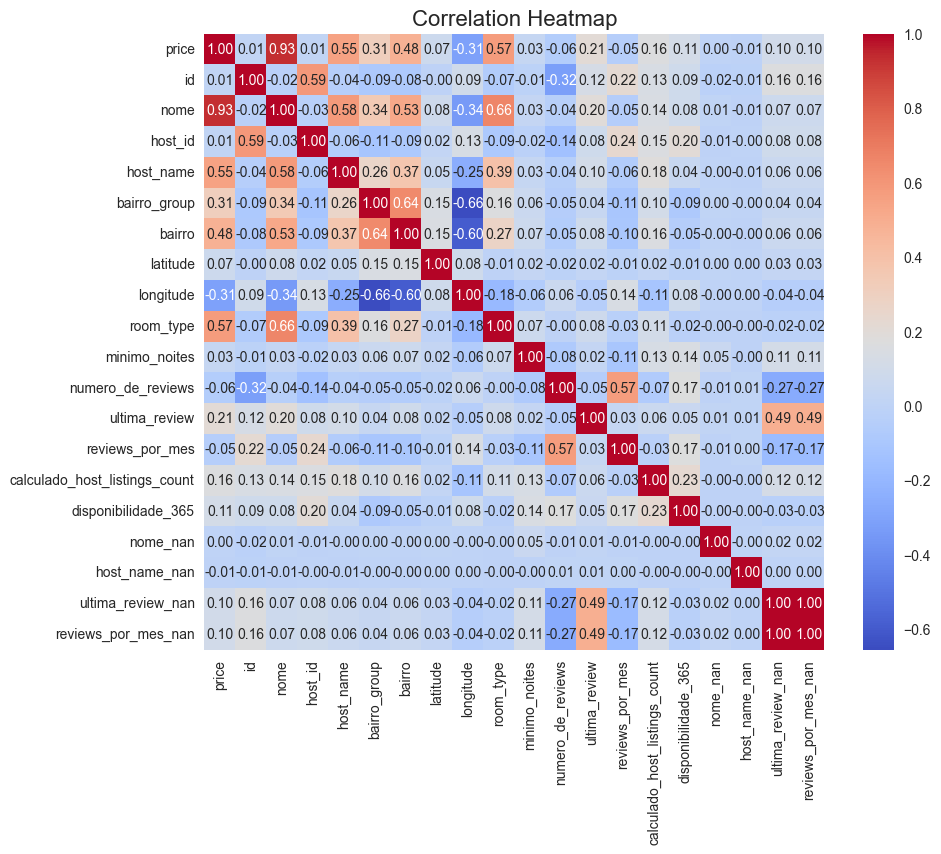

In [132]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# TREINAMENTO DO MODELO:

In [134]:
X = df_scaled.drop('price',axis=1)
y = df_scaled['price']


In [135]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((39115, 19), (9779, 19), (39115,), (9779,))

In [136]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [141]:
def evaluate_model(y_true, y_pred):
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    import numpy as np
    
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    
    return mae, rmse, r2

def model_trainer(X_train, X_test, y_train, y_test):
    models = {
        "Linear Regression": LinearRegression(),
        "Lasso": Lasso(),
        "Ridge": Ridge(),
        "K-Neighbors Regressor": KNeighborsRegressor(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest Regressor": RandomForestRegressor(),
        "AdaBoost Regressor": AdaBoostRegressor()
    }
    
    results = []
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
        test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)
        
        print(f"{name}")
        print("Desempenho do modelo para o conjunto de treinamento")
        print(f"- MAE: {train_mae:.4f}, RMSE: {train_rmse:.4f}, R2: {train_r2:.4f}")
        print("Desempenho do modelo para o conjunto de teste")
        print(f"- MAE: {test_mae:.4f}, RMSE: {test_rmse:.4f}, R2: {test_r2:.4f}")
        print("=" * 40)
        
        results.append([name, train_mae, train_rmse, train_r2, test_mae, test_rmse, test_r2])
    
    df_results = pd.DataFrame(results, columns=[
        "Model Name", "Train MAE", "Train RMSE", "Train R2", "Test MAE", "Test RMSE", "Test R2"
    ])
    
    return df_results.sort_values(by=["Test R2"], ascending=False)

# Exemplo de chamada da função
df_results = model_trainer(X_train, X_test, y_train, y_test)


Linear Regression
Desempenho do modelo para o conjunto de treinamento
- MAE: 22.9311, RMSE: 28.8309, R2: 0.8816
Desempenho do modelo para o conjunto de teste
- MAE: 22.8145, RMSE: 28.7002, R2: 0.8790
Lasso
Desempenho do modelo para o conjunto de treinamento
- MAE: 23.0370, RMSE: 29.0350, R2: 0.8799
Desempenho do modelo para o conjunto de teste
- MAE: 22.8874, RMSE: 28.8390, R2: 0.8778
Ridge
Desempenho do modelo para o conjunto de treinamento
- MAE: 22.9307, RMSE: 28.8309, R2: 0.8816
Desempenho do modelo para o conjunto de teste
- MAE: 22.8140, RMSE: 28.7000, R2: 0.8790
K-Neighbors Regressor
Desempenho do modelo para o conjunto de treinamento
- MAE: 13.9023, RMSE: 21.7557, R2: 0.9326
Desempenho do modelo para o conjunto de teste
- MAE: 16.8785, RMSE: 26.1173, R2: 0.8998
Decision Tree
Desempenho do modelo para o conjunto de treinamento
- MAE: 0.0000, RMSE: 0.0000, R2: 1.0000
Desempenho do modelo para o conjunto de teste
- MAE: 1.8594, RMSE: 12.4765, R2: 0.9771
Random Forest Regressor
Des

# Avaliação dos Modelos:

**1 -MAE (Mean Absolute Error):**
- A média dos erros absolutos entre os valores previstos e os valores reais. Indica o quanto, em média, as previsões estão afastadas dos valores reais.

**2 - MSE (Mean Squared Error):**
- A média dos quadrados dos erros entre os valores previstos e os valores reais. Indica o quanto, em média, as previsões estão afastadas dos valores reais.

**3 - RMSE (Root Mean Squared Error):**
- A raiz quadrada da média dos quadrados dos erros entre os valores previstos e os valores reais. Indica a magnitude do erro em relação aos valores reais.

**4 - R2 Score (R-squared):**
- Uma medida que mede a proporção do modelo de previsão que explica a variabilidade dos dados. Quanto mais próximo de 1, melhor o modelo de previsão.

In [142]:
display(df_results)

,Model Name,Train MAE,Train RMSE,Train R2,Test MAE,Test RMSE,Test R2
5,Random Forest Regressor,0.502792,2.985781,0.998730,1.458400,8.711386,0.988849
4,Decision Tree,0.000000,0.000000,1.000000,1.859393,12.476467,0.977126
6,AdaBoost Regressor,19.648573,25.430900,0.907875,19.552143,25.487586,0.904541
3,K-Neighbors Regressor,13.902339,21.755739,0.932578,16.878495,26.117257,0.899766
2,Ridge,22.930661,28.830885,0.881595,22.814011,28.700016,0.878962
0,Linear Regression,22.931050,28.830885,0.881595,22.814514,28.700177,0.878960
1,Lasso,23.037046,29.035047,0.879912,22.887416,28.839042,0.877786


### Explicação dos Modelos:

#### 1. **Random Forest Regressor (0.9887):**
O modelo **Random Forest** apresenta o melhor desempenho entre os modelos listados, com um R² de 0.9887. Isso significa que ele é capaz de explicar cerca de **98.87%** da variação nos dados, o que indica que é um modelo muito bom para este conjunto de dados.

#### 2. **Decision Tree (0.9784):**
O modelo **Decision Tree** tem um R² de 0.9784, o que também é muito bom, explicando **97.84%** da variação. No entanto, é um modelo que pode sofrer com o **overfitting** se não for ajustado adequadamente.

#### 3. **AdaBoost Regressor (0.9089):**
O **AdaBoost Regressor** tem um R² de 0.9089, explicando **90.89%** da variação. Esse modelo é geralmente mais robusto a erros e ajusta-se bem a dados complexos.

#### 4. **Ridge (0.8789):**
O modelo **Ridge** (uma variação da regressão linear que regulariza os coeficientes) tem um R² de 0.8789, o que significa que ele consegue explicar **87.89%** da variação. Apesar de ser uma boa performance, é um modelo mais simples em comparação aos anteriores.

#### 5. **Linear Regression (0.8789):**
A **Regressão Linear** (sem regularização) tem uma performance muito próxima da do **Ridge**, com um R² de 0.8789. Ela assume uma relação linear entre as variáveis, o que pode ser uma limitação em conjuntos de dados mais complexos.

#### 6. **Lasso (0.8778):**
O modelo **Lasso** (semelhante ao Ridge, mas com regularização L1) tem um R² de 0.8778, um pouco abaixo do **Ridge** e **Linear Regression**, mas ainda assim apresenta um bom ajuste aos dados.

#### 7. **K-Neighbors Regressor (0.8719):**
O **K-Neighbors Regressor** tem o pior desempenho entre os modelos listados, com um R² de 0.8719. Isso significa que ele consegue explicar **87.19%** da variação. Embora seja um modelo baseado em distância entre pontos de dados, ele pode ser menos eficiente em conjuntos de dados maiores ou mais complexos.

### Conclusão:
- O **Random Forest Regressor** é o modelo mais eficaz para este conjunto de dados, com o maior R².
- Modelos como **Decision Tree** e **AdaBoost** também têm um bom desempenho.
- Modelos mais simples como **Ridge**, **Linear Regression** e **Lasso** têm desempenhos similares, mas ainda não tão bons quanto os modelos baseados em árvores.
- O **K-Neighbors Regressor** apresenta a menor capacidade de explicação da variação nos dados, sendo o modelo menos eficaz entre os listados.


# Utlizando o melhor modelo:

In [143]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [144]:
some_data =X_test[:10]  
some_labels = y_test[:10]  
predictions = tree_reg.predict(some_data)
for label, prediction in zip(some_labels, predictions):
    print(f"Actual: {label:.2f}, Predicted: {prediction:.2f}")

Actual: 110.00, Predicted: 110.00
Actual: 40.00, Predicted: 40.00
Actual: 57.00, Predicted: 57.00
Actual: 334.00, Predicted: 334.00
Actual: 195.00, Predicted: 195.00
Actual: 120.00, Predicted: 120.00
Actual: 89.00, Predicted: 89.00
Actual: 60.00, Predicted: 60.00
Actual: 120.00, Predicted: 120.00
Actual: 120.00, Predicted: 120.00


## REALIZANDO PREVISÃO:

In [175]:
# Parâmetros fornecidos
parametros = {
    'id': -1.731342,
    'nome': 1.201533,  # nome Skylit Midtown Castle foi mapeado para este código
    'host_id': -0.860173,
    'host_name': 0.473966,  # Jennifer
    'bairro_group': 0.824520,
    'bairro': 1.346582,
    'latitude': 0.452411,
    'longitude': -0.684642,
    'room_type': 0.924227,
    'minimo_noites': -0.293999,
    'numero_de_reviews': 0.487654,
    'ultima_review': -0.330862,
    'reviews_por_mes': -0.564782,
    'calculado_host_listings_count': -0.156104,
    'disponibilidade_365': 1.840364,
    'nome_nan': -0.018093,
    'host_name_nan': -0.020729,
    'ultima_review_nan': -0.508716,
    'reviews_por_mes_nan': -0.508716
}



new_data = np.array([list(parametros.values())])  

# Faz a previsão
new_prediction = tree_reg.predict(new_data)

# Exibe a previsão formatada
print(f"Previsão do valor do aluguel: {new_prediction[0]:.2f}")



Previsão do valor do aluguel: 225.00


# SALVAR OS MODELOS:

In [33]:
from joblib import dump

# Salva o modelo
dump(tree_reg, "modelo.pkl")


['modelo.pkl']

In [35]:
from joblib import load
some_data =X_test[:10]  # Indexação NumPy
modelo_carregado = load("modelo.pkl")
resultado = modelo_carregado.predict(some_data)
